<a href="https://colab.research.google.com/github/geroalbornoz/markets/blob/master/Arg_Merval_USD_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><center>Análisis de Regresión Linear Simple</center></h1>


<h4>About this Notebook</h4>
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.


### Importing Needed packages

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (19,9)

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

In [52]:
!wget -O dolares.csv https://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv

--2021-01-13 19:27:16--  https://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv
Resolving infra.datos.gob.ar (infra.datos.gob.ar)... 186.33.215.176
Connecting to infra.datos.gob.ar (infra.datos.gob.ar)|186.33.215.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 758851 (741K) [text/csv]
Saving to: ‘dolares.csv’

dolares.csv         100%[===================>] 741.07K  1.04MB/s    in 0.7s    

2021-01-13 19:27:18 (1.04 MB/s) - ‘dolares.csv’ saved [758851/758851]



In [29]:
!wget -O indices.csv https://infra.datos.gob.ar/catalog/sspm/dataset/169/distribution/169.1/download/indices-bursatiles-argentina-indices-cotizaciones.csv

--2021-01-13 19:27:12--  https://infra.datos.gob.ar/catalog/sspm/dataset/169/distribution/169.1/download/indices-bursatiles-argentina-indices-cotizaciones.csv
Resolving infra.datos.gob.ar (infra.datos.gob.ar)... 186.33.215.176
Connecting to infra.datos.gob.ar (infra.datos.gob.ar)|186.33.215.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236227 (231K) [text/csv]
Saving to: ‘indices.csv’

indices.csv         100%[===================>] 230.69K   427KB/s    in 0.5s    

2021-01-13 19:27:13 (427 KB/s) - ‘indices.csv’ saved [236227/236227]



<h2 id="reading_data">Reading the data in</h2>

In [53]:
df1 = pd.read_csv("dolares.csv") #info historica de tipos de cambio

In [54]:
df2 = pd.read_csv("indices.csv") #info historica de indices

**Explorando el Primer Data Set**

In [55]:
df1.tail()

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
6842,2020-11-27,86.25,81.0383,81.07,119720.0,150.055127,81.29,1593132.0,85.05,2028840.0,90.22,845587.0,95.00,482926.0,100.90,140913.0,106.90,59559.0
6843,2020-11-28,86.25,81.0383,81.07,NaN,150.055127,81.29,1593132.0,85.05,2028840.0,90.22,845587.0,95.00,482926.0,100.90,140913.0,106.90,59559.0
6844,2020-11-29,86.25,81.0383,81.07,NaN,150.055127,81.29,1593132.0,85.05,2028840.0,90.22,845587.0,95.00,482926.0,100.90,140913.0,106.90,59559.0
6845,2020-11-30,86.50,81.2967,81.31,120100.0,151.684088,81.30,1593132.0,84.73,2325868.0,89.98,892438.0,94.85,492578.0,100.55,141654.0,106.48,72337.0
6846,2020-12-01,86.50,81.3950,81.43,131150.0,149.153499,84.48,2391037.0,89.83,903726.0,94.63,491250.0,100.20,146151.0,105.80,72472.0,111.40,24495.0


,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
6842,2020-11-27,86.25,81.0383,81.07,119720.0,150.055127,81.29,1593132.0,85.05,2028840.0,90.22,845587.0,95.00,482926.0,100.90,140913.0,106.90,59559.0
6843,2020-11-28,86.25,81.0383,81.07,NaN,150.055127,81.29,1593132.0,85.05,2028840.0,90.22,845587.0,95.00,482926.0,100.90,140913.0,106.90,59559.0
6844,2020-11-29,86.25,81.0383,81.07,NaN,150.055127,81.29,1593132.0,85.05,2028840.0,90.22,845587.0,95.00,482926.0,100.90,140913.0,106.90,59559.0
6845,2020-11-30,86.50,81.2967,81.31,120100.0,151.684088,81.30,1593132.0,84.73,2325868.0,89.98,892438.0,94.85,492578.0,100.55,141654.0,106.48,72337.0
6846,2020-12-01,86.50,81.3950,81.43,131150.0,149.153499,84.48,2391037.0,89.83,903726.0,94.63,491250.0,100.20,146151.0,105.80,72472.0,111.40,24495.0


In [56]:
df1.columns

Index(['indice_tiempo', 'tipo_cambio_bna_vendedor', 'tipo_cambio_a3500',
       'tipo_cambio_mae', 'volumen_mae', 'tipo_cambio_implicito_en_adrs',
       'futuro_rofex_usd1m', 'interes_abierto_1m', 'futuro_rofex_usd2m',
       'interes_abierto_2m', 'futuro_rofex_usd3m', 'interes_abierto_3m',
       'futuro_rofex_usd4m', 'interes_abierto_4m', 'futuro_rofex_usd5m',
       'interes_abierto_5m', 'futuro_rofex_usd6m', 'interes_abierto_6m'],
      dtype='object')

Index(['indice_tiempo', 'tipo_cambio_bna_vendedor', 'tipo_cambio_a3500',
       'tipo_cambio_mae', 'volumen_mae', 'tipo_cambio_implicito_en_adrs',
       'futuro_rofex_usd1m', 'interes_abierto_1m', 'futuro_rofex_usd2m',
       'interes_abierto_2m', 'futuro_rofex_usd3m', 'interes_abierto_3m',
       'futuro_rofex_usd4m', 'interes_abierto_4m', 'futuro_rofex_usd5m',
       'interes_abierto_5m', 'futuro_rofex_usd6m', 'interes_abierto_6m'],
      dtype='object')

In [57]:
df1.shape

(6847, 18)

(6847, 18)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   indice_tiempo                  6847 non-null   object 
 1   tipo_cambio_bna_vendedor       2221 non-null   float64
 2   tipo_cambio_a3500              6847 non-null   float64
 3   tipo_cambio_mae                4536 non-null   float64
 4   volumen_mae                    3038 non-null   float64
 5   tipo_cambio_implicito_en_adrs  6845 non-null   float64
 6   futuro_rofex_usd1m             4351 non-null   float64
 7   interes_abierto_1m             4351 non-null   float64
 8   futuro_rofex_usd2m             4351 non-null   float64
 9   interes_abierto_2m             4351 non-null   float64
 10  futuro_rofex_usd3m             4351 non-null   float64
 11  interes_abierto_3m             4351 non-null   float64
 12  futuro_rofex_usd4m             4351 non-null   f

**Explorando el segundo Data Set**

In [59]:
# take a look at the dataset
df2.head()

,indice_tiempo,bolsa_g,burcap,merval,merval_arg,merval_25
0,2004-10-04,51553.00,2881.26,1167.09,1085.43,1151.0
1,2004-10-05,50346.26,2830.79,1135.37,1054.10,1151.0
2,2004-10-06,50553.64,2852.15,1128.00,1046.48,1113.0
3,2004-10-07,50978.02,2868.16,1140.26,1059.00,1126.0
4,2004-10-08,50763.08,2853.87,1128.74,1048.06,1115.0


,indice_tiempo,bolsa_g,burcap,merval,merval_arg,merval_25
0,2004-10-04,51553.00,2881.26,1167.09,1085.43,1151.0
1,2004-10-05,50346.26,2830.79,1135.37,1054.10,1151.0
2,2004-10-06,50553.64,2852.15,1128.00,1046.48,1113.0
3,2004-10-07,50978.02,2868.16,1140.26,1059.00,1126.0
4,2004-10-08,50763.08,2853.87,1128.74,1048.06,1115.0


In [60]:
df2.shape

(5903, 6)

(5903, 6)

In [61]:
df2.columns

Index(['indice_tiempo', 'bolsa_g', 'burcap', 'merval', 'merval_arg',
       'merval_25'],
      dtype='object')

Index(['indice_tiempo', 'bolsa_g', 'burcap', 'merval', 'merval_arg',
       'merval_25'],
      dtype='object')

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5903 entries, 0 to 5902
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   indice_tiempo  5903 non-null   object 
 1   bolsa_g        3990 non-null   float64
 2   burcap         3545 non-null   float64
 3   merval         3990 non-null   float64
 4   merval_arg     3990 non-null   float64
 5   merval_25      3545 non-null   float64
dtypes: float64(5), object(1)
memory usage: 276.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5903 entries, 0 to 5902
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   indice_tiempo  5903 non-null   object 
 1   bolsa_g        3990 non-null   float64
 2   burcap         3545 non-null   float64
 3   merval         3990 non-null   float64
 4   merval_arg     3990 non-null   float64
 5   merval_25      3545 non-null   float64
dtypes: float64(5), object(1)


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [63]:
# summarize the data
df1.describe()

,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
count,2221.000000,6847.000000,4536.000000,3.038000e+03,6845.000000,4351.000000,4.351000e+03,4351.000000,4.351000e+03,4351.000000,4.351000e+03,4351.000000,4.351000e+03,4351.000000,4.351000e+03,4351.000000,4.351000e+03
mean,30.856837,12.365986,17.097996,2.218796e+05,15.517048,17.952452,7.460627e+05,18.588362,6.176222e+05,19.237604,4.566830e+05,19.869719,3.444413e+05,20.496883,2.691909e+05,21.121652,2.158884e+05
std,22.807343,17.398446,19.761607,1.450258e+05,26.714475,20.346072,5.746329e+05,21.351184,4.527460e+05,22.405786,3.896199e+05,23.429317,3.432233e+05,24.453027,2.723080e+05,25.477810,2.678216e+05
min,8.490000,1.991700,3.012000,5.000000e+02,2.180124,3.468000,1.300000e+01,3.508000,2.870000e+02,3.549000,2.002200e+04,3.592000,3.279600e+04,3.628000,2.900000e+04,3.667000,8.305000e+03
25%,14.700000,3.103900,4.142250,1.179250e+05,3.109244,4.306000,3.960050e+05,4.342000,3.426605e+05,4.384000,2.721800e+05,4.425000,1.914350e+05,4.470000,1.380940e+05,4.514000,9.058000e+04
50%,17.785000,4.129700,8.414500,1.830000e+05,4.352211,8.631000,5.664060e+05,8.792000,4.943790e+05,8.985000,3.534090e+05,9.188000,2.582360e+05,9.395000,1.942400e+05,9.604000,1.453330e+05
75%,44.400000,14.227700,17.480750,2.948675e+05,14.516781,17.964000,8.699460e+05,18.311000,7.128160e+05,18.681500,5.053450e+05,19.005000,3.752955e+05,19.310000,2.912490e+05,19.644500,2.565280e+05
max,86.500000,81.395000,81.430000,1.546850e+06,181.666667,84.480000,3.517970e+06,89.830000,3.473273e+06,94.630000,3.430609e+06,100.200000,3.436969e+06,105.800000,2.763188e+06,111.400000,2.766503e+06


,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
count,2221.000000,6847.000000,4536.000000,3.038000e+03,6845.000000,4351.000000,4.351000e+03,4351.000000,4.351000e+03,4351.000000,4.351000e+03,4351.000000,4.351000e+03,4351.000000,4.351000e+03,4351.000000,4.351000e+03
mean,30.856837,12.365986,17.097996,2.218796e+05,15.517048,17.952452,7.460627e+05,18.588362,6.176222e+05,19.237604,4.566830e+05,19.869719,3.444413e+05,20.496883,2.691909e+05,21.121652,2.158884e+05
std,22.807343,17.398446,19.761607,1.450258e+05,26.714475,20.346072,5.746329e+05,21.351184,4.527460e+05,22.405786,3.896199e+05,23.429317,3.432233e+05,24.453027,2.723080e+05,25.477810,2.678216e+05
min,8.490000,1.991700,3.012000,5.000000e+02,2.180124,3.468000,1.300000e+01,3.508000,2.870000e+02,3.549000,2.002200e+04,3.592000,3.279600e+04,3.628000,2.900000e+04,3.667000,8.305000e+03
25%,14.700000,3.103900,4.142250,1.179250e+05,3.109244,4.306000,3.960050e+05,4.342000,3.426605e+05,4.384000,2.721800e+05,4.425000,1.914350e+05,4.470000,1.380940e+05,4.514000,9.058000e+04
50%,17.785000,4.129700,8.414500,1.830000e+05,4.352211,8.631000,5.664060e+05,8.792000,4.943790e+05,8.985000,3.534090e+05,9.188000,2.582360e+05,9.395000,1.942400e+05,9.604000,1.453330e+05
75%,44.400000,14.227700,17.480750,2.948675e+05,14.516781,17.964000,8.699460e+05,18.311000,7.128160e+05,18.681500,5.053450e+05,19.005000,3.752955e+05,19.310000,2.912490e+05,19.644500,2.565280e+05
max,86.500000,81.395000,81.430000,1.546850e+06,181.666667,84.480000,3.517970e+06,89.830000,3.473273e+06,94.630000,3.430609e+06,100.200000,3.436969e+06,105.800000,2.763188e+06,111.400000,2.766503e+06


In [64]:
# summarize the data
df2.describe()

,bolsa_g,burcap,merval,merval_arg,merval_25
count,3.990000e+03,3545.000000,3990.000000,3990.000000,3545.000000
mean,5.000485e+05,23504.097836,11248.534724,9942.790677,8372.645368
std,5.517250e+05,26233.515235,13098.261827,11545.618819,10149.826091
min,5.034626e+04,2814.380000,828.990000,591.870000,828.940000
25%,1.131474e+05,7172.360000,2089.847500,1521.712500,2003.120000
50%,1.863924e+05,9533.550000,3357.150000,2589.270000,2825.800000
75%,7.547848e+05,32254.870000,17235.110000,15875.457500,11622.540000
max,2.331170e+06,109493.300000,55427.270000,39634.670000,41313.960000


,bolsa_g,burcap,merval,merval_arg,merval_25
count,3.990000e+03,3545.000000,3990.000000,3990.000000,3545.000000
mean,5.000485e+05,23504.097836,11248.534724,9942.790677,8372.645368
std,5.517250e+05,26233.515235,13098.261827,11545.618819,10149.826091
min,5.034626e+04,2814.380000,828.990000,591.870000,828.940000
25%,1.131474e+05,7172.360000,2089.847500,1521.712500,2003.120000
50%,1.863924e+05,9533.550000,3357.150000,2589.270000,2825.800000
75%,7.547848e+05,32254.870000,17235.110000,15875.457500,11622.540000
max,2.331170e+06,109493.300000,55427.270000,39634.670000,41313.960000


Lets select some features to explore more.

In [65]:
concatenado = pd.merge(df1, df2, how="left", on="indice_tiempo")


In [66]:
concatenado.columns

Index(['indice_tiempo', 'tipo_cambio_bna_vendedor', 'tipo_cambio_a3500',
       'tipo_cambio_mae', 'volumen_mae', 'tipo_cambio_implicito_en_adrs',
       'futuro_rofex_usd1m', 'interes_abierto_1m', 'futuro_rofex_usd2m',
       'interes_abierto_2m', 'futuro_rofex_usd3m', 'interes_abierto_3m',
       'futuro_rofex_usd4m', 'interes_abierto_4m', 'futuro_rofex_usd5m',
       'interes_abierto_5m', 'futuro_rofex_usd6m', 'interes_abierto_6m',
       'bolsa_g', 'burcap', 'merval', 'merval_arg', 'merval_25'],
      dtype='object')

Index(['indice_tiempo', 'tipo_cambio_bna_vendedor', 'tipo_cambio_a3500',
       'tipo_cambio_mae', 'volumen_mae', 'tipo_cambio_implicito_en_adrs',
       'futuro_rofex_usd1m', 'interes_abierto_1m', 'futuro_rofex_usd2m',
       'interes_abierto_2m', 'futuro_rofex_usd3m', 'interes_abierto_3m',
       'futuro_rofex_usd4m', 'interes_abierto_4m', 'futuro_rofex_usd5m',
       'interes_abierto_5m', 'futuro_rofex_usd6m', 'interes_abierto_6m',
       'bolsa_g', 'burcap', 'merval', 'merval_arg', 'merval_25'],
      dtype='object')

In [67]:
concatenado["Merval_en_USD"] = concatenado["merval"] / concatenado["tipo_cambio_implicito_en_adrs"] 

In [68]:
concatenado.drop(columns= ['volumen_mae'],inplace=True)

In [ ]:
concatenado.head(30 )

we can plot each of these features:

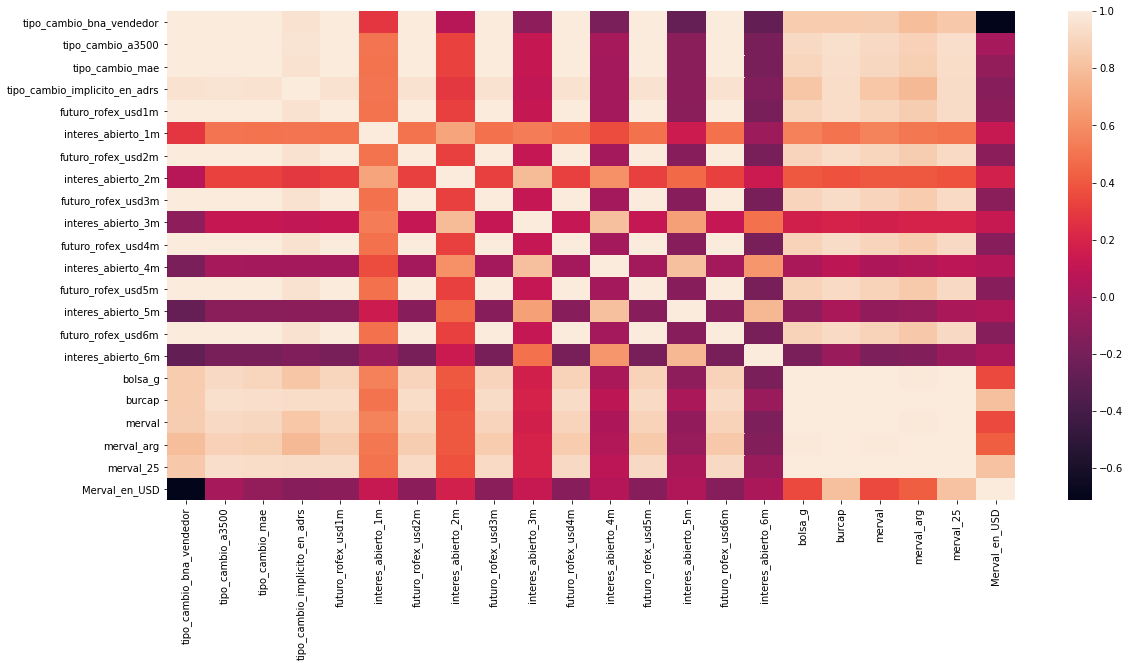

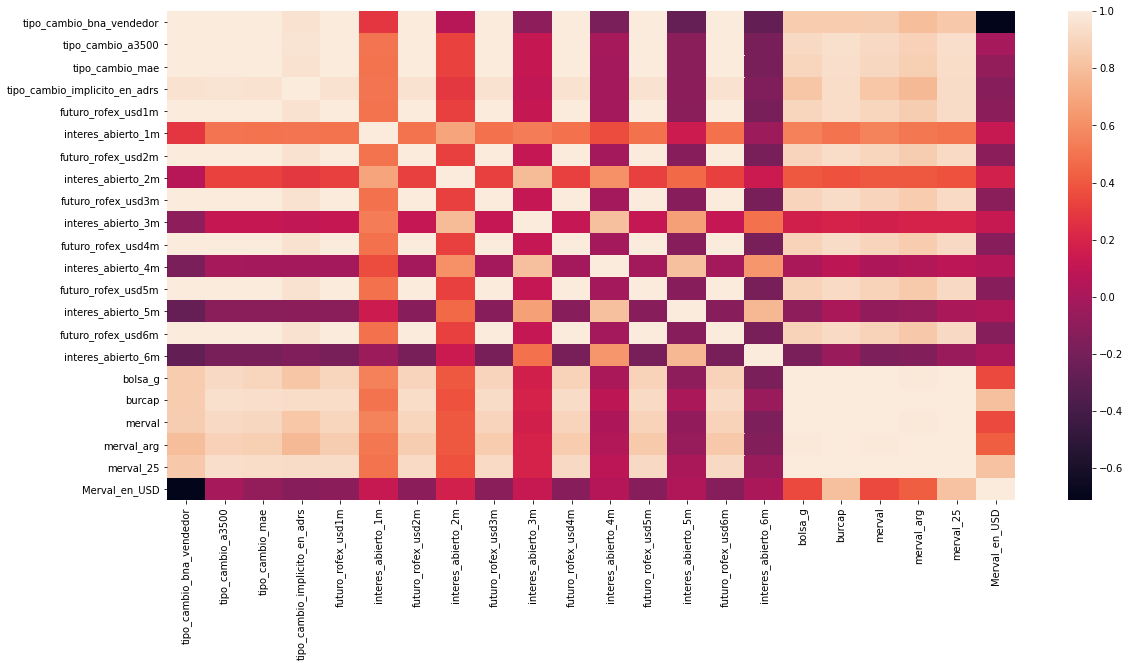

In [70]:
sns.heatmap(concatenado.corr())

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

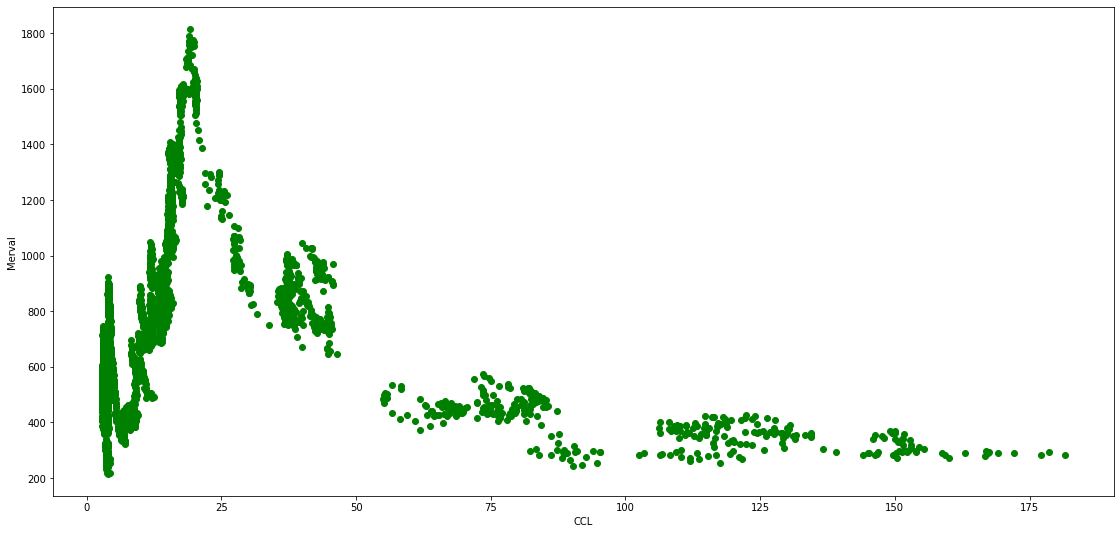

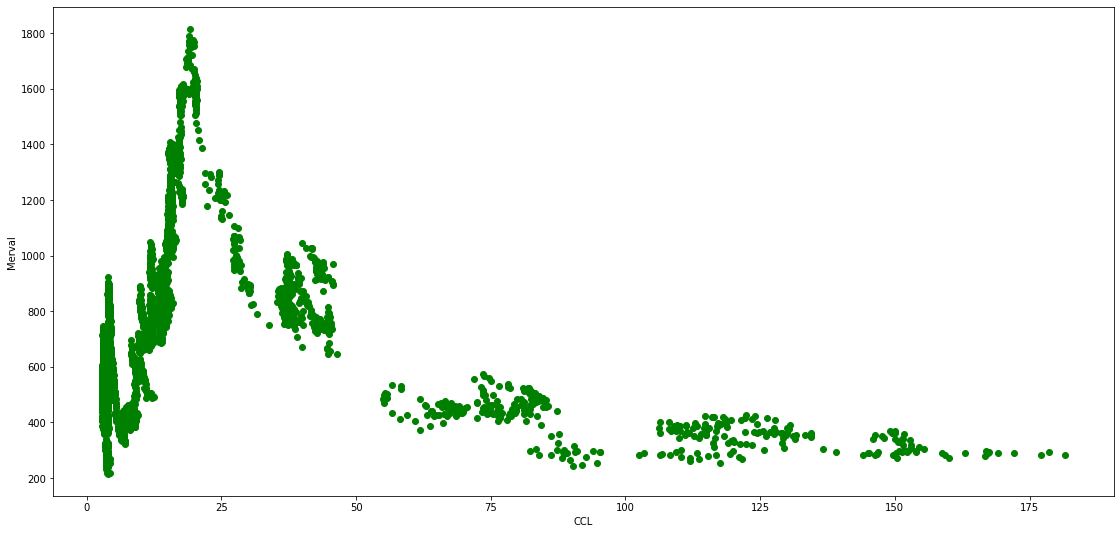

In [71]:
plt.scatter(concatenado.tipo_cambio_implicito_en_adrs, concatenado.Merval_en_USD,  color="green")
plt.xlabel("CCL")
plt.ylabel("Merval")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [72]:
msk = np.random.rand(len(concatenado)) < 0.8
train = concatenado[msk]
test = concatenado[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

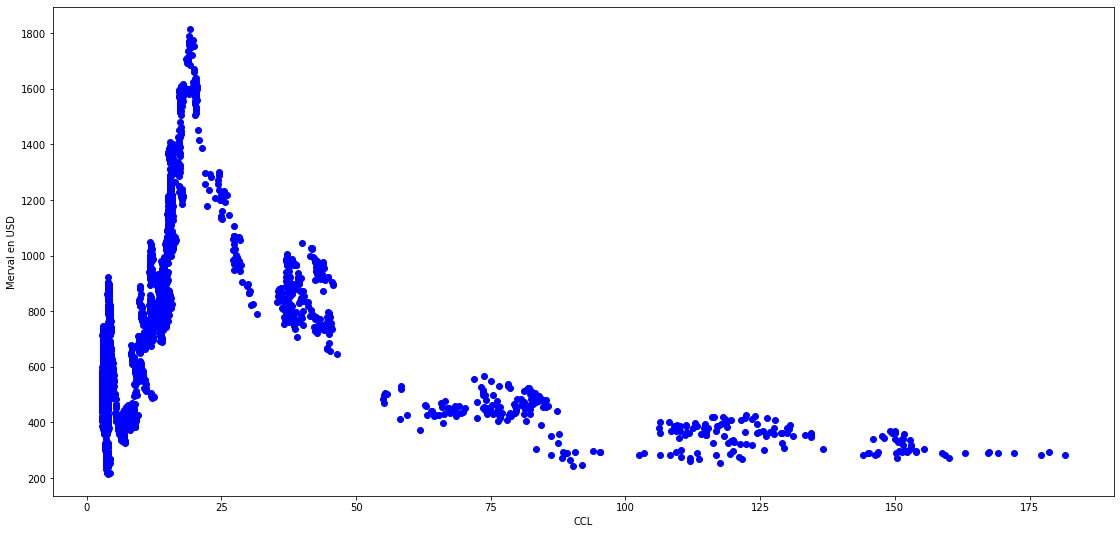

In [73]:
plt.scatter(train.tipo_cambio_implicito_en_adrs, train.Merval_en_USD,  color='blue')
plt.xlabel("CCL")
plt.ylabel("Merval en USD")
plt.show()

#### Modeling
Using sklearn package to model data.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['tipo_cambio_implicito_en_adrs']])
train_y = np.asanyarray(train[['Merval_en_USD']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs

we can plot the fit line over the data:

In [ ]:
plt.scatter(train.tipo_cambio_implicito_en_adrs, train.Merval_en_USD,  color='black')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("CCL")
plt.ylabel("Merval en USD")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['tipo_cambio_implicito_en_adrs']])
test_y = np.asanyarray(test[['Merval_en_USD']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>